## Your first agent
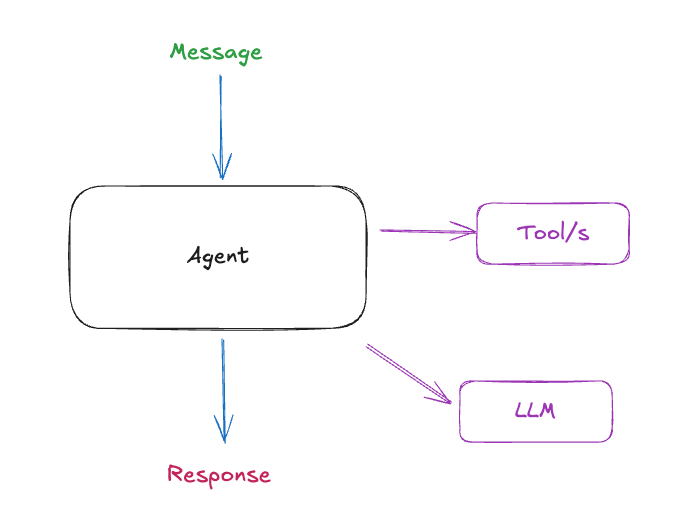

At its core an AutoGen Agent is an entity that receives a message and it uses an LLM and (optionally) one or more tools, to generate
a proper response message back.  

Let's see how to create an agent with Autogen.

In [6]:
import sys
sys.path.append("..")
from autogen_agentchat.agents import AssistantAgent
from model_clients.azure import get_model
from rich import print
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken
from typing import Sequence

In this cell we define the function (a.k.a the tool) that the LLM will use to complete our requests

In [8]:
async def web_search(query: str) -> str:
    """Find information on the web"""
    if "AutoGen" in query:
        return (
            "AutoGen is a programming framework for building multi-agent applications."
        )
    elif "Zurich" in query:
        return (
            "Zurich is the largest city in Switzerland, current temperature is 10 degrees.",
        )    
    else:
        return "Sorry, I don't have information on that."

Then we create the agent, note that we pass the list of function to use (`web_search` in this case) and we set `reflect_on_tool_use` 
to `False` meaning that we don't ask the LLM to apply any further reasoning on what has been returned from the function.  

Try to set it `True` to see the difference in the behavior.

In [9]:
model_client = get_model() # get the LLM model to use
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="You are an AI Assistant.",
    reflect_on_tool_use=False,  
)

It's now time to use the agent we just created, for this we'll create a simple input loop and watch the results.  

Try to ask simple questions like "*Hello how are you?"* or *"What is AutoGen"* to see the agent behavior.
Type "*exit"* to stop.

In [10]:
response:Sequence[TextMessage]

while True:
        # Read a message from the user.
        user_message = input("(type exit to stop) -> You: ")
        if user_message == "exit":
            break

        # Process the message.
        response = await agent.on_messages(
            [TextMessage(content=user_message, source="user")],
            cancellation_token=CancellationToken(),
        )
        print(response)

Response(
    chat_message=ToolCallSummaryMessage(
        source='assistant',
        models_usage=None,
        metadata={},
        content='AutoGen is a programming framework for building multi-agent applications.',
        type='ToolCallSummaryMessage'
    ),
    inner_messages=[
        ToolCallRequestEvent(
            source='assistant',
            models_usage=RequestUsage(prompt_tokens=60, completion_tokens=16),
            metadata={},
            content=[
                FunctionCall(
                    id='call_87G2rjcywBtIJCIBrQsrJhbb',
                    arguments='{"query":"AutoGen"}',
                    name='web_search'
                )
            ],
            type='ToolCallRequestEvent'
        ),
        ToolCallExecutionEvent(
            source='assistant',
            models_usage=None,
            metadata={},
            content=[
                FunctionExecutionResult(
                    content='AutoGen is a programming framework for building multi-agent applications.',
                    name='web_search',
                    call_id='call_87G2rjcywBtIJCIBrQsrJhbb',
                    is_error=False
                )
            ],
            type='ToolCallExecutionEvent'
        )
    ]
)

Response(
    chat_message=TextMessage(
        source='assistant',
        models_usage=RequestUsage(prompt_tokens=106, completion_tokens=34),
        metadata={},
        content='AutoGen is a programming framework designed for creating multi-agent applications. It provides 
tools and structures that allow developers to efficiently build and manage applications involving multiple 
interacting agents.',
        type='TextMessage'
    ),
    inner_messages=[]
)

Take some time to see, what's inside the agent response.  


If you ever used LLM function calling from scratch, you noticed for sure how easy is to do the same with Autogen. 🤩

Also note that, together with the response, the `inner_messages` property contains all the messages exchanged between the
LLM and the agent.

The use of a strange `on_message` method to invoke the agent, should reveal you the messaging nature of the framework.  
There is also a wrapper command `run` that can be used instead of `on_messages`.

Let's see an example with streaming option, feature that is fully supported by AutoGen.

In [5]:
streaming_assistant = AssistantAgent(
    name="assistant",
    model_client=model_client,
    system_message="You are a helpful assistant.",
    model_client_stream=True,  # Enable streaming tokens.
)

async for message in streaming_assistant.run_stream(task="Tell me a short joke"):  # type: ignore
    print(message)

TextMessage(source='user', models_usage=None, metadata={}, content='Tell me a short joke', type='TextMessage')

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content='Why',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=" don't",
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' skeleton',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content='s',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' fight',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' each',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' other',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content='?',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' They',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=" don't",
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' have',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' the',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content=' guts',
    type='ModelClientStreamingChunkEvent'
)

ModelClientStreamingChunkEvent(
    source='assistant',
    models_usage=None,
    metadata={},
    content='!',
    type='ModelClientStreamingChunkEvent'
)

TextMessage(
    source='assistant',
    models_usage=RequestUsage(prompt_tokens=0, completion_tokens=0),
    metadata={},
    content="Why don't skeletons fight each other? They don't have the guts!",
    type='TextMessage'
)

TaskResult(
    messages=[
        TextMessage(
            source='user',
            models_usage=None,
            metadata={},
            content='Tell me a short joke',
            type='TextMessage'
        ),
        TextMessage(
            source='assistant',
            models_usage=RequestUsage(prompt_tokens=0, completion_tokens=0),
            metadata={},
            content="Why don't skeletons fight each other? They don't have the guts!",
            type='TextMessage'
        )
    ],
    stop_reason=None
)

Until now we have seen a simple agent in action, Let's see now two agents interacting with each other in the next notebook.